# Restaurant Food Cost

### Problem Statement:
>Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, "the cost". The below study using Meachine learning we will be predicting the cost of the food served by the restaurants across different cities in India. We will use Data Science skills to investigate the factors that really affect the cost, lets analyse some very interesting insights that might help us choose what to eat and from where.

### FEATURES:
#### TITLE: 
    The feature of the restaurant which can help identify what and for whom it is suitable for.

#### RESTAURANT_ID: 
    A unique ID for each restaurant.

#### CUISINES: 
    The variety of cuisines that the restaurant offers.

#### TIME: 
    The open hours of the restaurant.

#### CITY: 
    The city in which the restaurant is located.

#### LOCALITY: 
    The locality of the restaurant.

#### RATING: 
    The average rating of the restaurant by customers.

#### VOTES: 
    The overall votes received by the restaurant.

#### COST: 
    The average cost of a two-person meal.

### We will start our Analysis in importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

importing our data 

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df

TITLE  RESTAURANT_ID  \
0          CASUAL DINING           9438   
1      CASUAL DINING,BAR          13198   
2          CASUAL DINING          10915   
3            QUICK BITES           6346   
4         DESSERT PARLOR          15387   
...                  ...            ...   
12685        QUICK BITES          13228   
12686  CASUAL DINING,BAR           9686   
12687             LOUNGE          11133   
12688      CASUAL DINING           6134   
12689      CASUAL DINING           6430   

                                               CUISINES  \
0                           Malwani, Goan, North Indian   
1                        Asian, Modern Indian, Japanese   
2            North Indian, Chinese, Biryani, Hyderabadi   
3                                      Tibetan, Chinese   
4                                              Desserts   
...                                                 ...   
12685                       North Indian, Burger, Kebab   
12686                                 Goan, Continental   
12687          Finger Food, Continental, Asian, Chinese   
12688  North Indian, South Indian, Chinese, Street Food   
12689                             North Indian, Chinese   

                                                   TIME         CITY  \
0                11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)        Thane   
1                                  6pm – 11pm (Mon-Sun)      Chennai   
2                   11am – 3:30pm, 7pm – 11pm (Mon-Sun)      Chennai   
3                               11:30am – 1am (Mon-Sun)       Mumbai   
4                                  11am – 1am (Mon-Sun)       Mumbai   
...                                                 ...          ...   
12685  12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...    Hyderabad   
12686   12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...       Mumbai   
12687                        12noon – 12:30AM (Mon-Sun)  Navi Mumbai   
12688                           6am – 10:45pm (Mon-Sun)      Chennai   
12689                          12:30pm – 11pm (Mon-Sun)    Hyderabad   

                   LOCALITY RATING       VOTES  COST  
0            Dombivali East    3.6    49 votes  1200  
1                 Ramapuram    4.2    30 votes  1500  
2                Saligramam    3.8   221 votes   800  
3               Bandra West    4.1    24 votes   800  
4               Lower Parel    3.8   165 votes   300  
...                     ...    ...         ...   ...  
12685            Gachibowli    3.8   546 votes   500  
12686  Bandra Kurla Complex    4.3  1214 votes  1800  
12687                 Vashi    4.0   608 votes  1300  
12688           Maduravoyal    3.5    32 votes   400  
12689       Vanasthalipuram    3.4   677 votes   600  

[12690 rows x 9 columns]

In [3]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

Lets identify the duplicate columns and remove them from our data.

In [4]:
df.duplicated().sum()

25

In [5]:
df= df.drop_duplicates() #Duplicate columns are removed since it will affect in our model Training

Identifing Missing values in our data-set

In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

### EDA: 
###### Feature Engineering

### We will split our data into multiple pieces and we will clean our data.

In [7]:
TITLE = df.TITLE #-------------------------------->>>> COLUMN 1

In [8]:
TITLE

0            CASUAL DINING
1        CASUAL DINING,BAR
2            CASUAL DINING
3              QUICK BITES
4           DESSERT PARLOR
               ...        
12685          QUICK BITES
12686    CASUAL DINING,BAR
12687               LOUNGE
12688        CASUAL DINING
12689        CASUAL DINING
Name: TITLE, Length: 12665, dtype: object

In [9]:
TITLE = TITLE.str.split(",")

t1 = TITLE.str[0]
t2 = TITLE.str[1]

In [10]:
t1.unique(),t1.shape,len(t1.unique()), t2.unique(), t2.shape, len(t2.unique()), t2.value_counts()

(array(['CASUAL DINING', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ',
        'MICROBREWERY', 'BAKERY', 'None', 'BAR', 'PUB', 'BEVERAGE SHOP',
        'FINE DINING', 'SWEET SHOP', 'FOOD COURT', 'LOUNGE', 'FOOD TRUCK',
        'MESS', 'KIOSK', 'CLUB', 'DHABA', 'MEAT SHOP', 'COCKTAIL BAR',
        'CONFECTIONERY', 'PAAN SHOP'], dtype=object),
 (12665,),
 23,
 array([nan, 'BAR', 'BEVERAGE SHOP', 'IRANI CAFE', 'QUICK BITES',
        'CASUAL DINING', 'DESSERT PARLOR', 'SWEET SHOP', 'LOUNGE',
        'FOOD COURT', 'KIOSK', 'CAFÉ', 'CONFECTIONERY', 'MICROBREWERY',
        'PUB', 'BAKERY', 'CLUB', 'FINE DINING', 'FOOD TRUCK', 'PAAN SHOP'],
       dtype=object),
 (12665,),
 20,
 BAR               428
 QUICK BITES       260
 CASUAL DINING     256
 DESSERT PARLOR    138
 CAFÉ               94
 BAKERY             69
 SWEET SHOP         53
 LOUNGE             46
 PUB                35
 BEVERAGE SHOP      34
 MICROBREWERY       27
 FOOD COURT         15
 FINE DINING         8
 CLUB                5
 KIO

In [11]:
TITLE = pd.DataFrame({"Title1": t1, "Title2": t2})

In [12]:
TITLE= pd.get_dummies(TITLE  ,columns=['Title2'], prefix=["t2"])

In [13]:
TITLE.columns

Index(['Title1', 't2_BAKERY', 't2_BAR', 't2_BEVERAGE SHOP', 't2_CAFÉ',
       't2_CASUAL DINING', 't2_CLUB', 't2_CONFECTIONERY', 't2_DESSERT PARLOR',
       't2_FINE DINING', 't2_FOOD COURT', 't2_FOOD TRUCK', 't2_IRANI CAFE',
       't2_KIOSK', 't2_LOUNGE', 't2_MICROBREWERY', 't2_PAAN SHOP', 't2_PUB',
       't2_QUICK BITES', 't2_SWEET SHOP'],
      dtype='object')

We are only selecting the columns that are repeated multiple times.

In [14]:
TITLE=TITLE[['Title1', 't2_BAKERY', 't2_BAR', 't2_BEVERAGE SHOP', 't2_CAFÉ',
       't2_CASUAL DINING', 't2_CLUB', 't2_DESSERT PARLOR',
       't2_FINE DINING', 't2_FOOD COURT', 't2_KIOSK', 't2_LOUNGE', 't2_MICROBREWERY', 't2_PUB',
       't2_QUICK BITES', 't2_SWEET SHOP']]

In [15]:
TITLE.isnull().sum()

Title1               0
t2_BAKERY            0
t2_BAR               0
t2_BEVERAGE SHOP     0
t2_CAFÉ              0
t2_CASUAL DINING     0
t2_CLUB              0
t2_DESSERT PARLOR    0
t2_FINE DINING       0
t2_FOOD COURT        0
t2_KIOSK             0
t2_LOUNGE            0
t2_MICROBREWERY      0
t2_PUB               0
t2_QUICK BITES       0
t2_SWEET SHOP        0
dtype: int64

In [16]:
len(df.RESTAURANT_ID.unique()) #-------------------------------->>>> COLUMN 2

11892

In [17]:
R_id = df.RESTAURANT_ID

Clearly RESTAURANT_ID wont have any corelation in our data but lets see the other column.

In [18]:
Rest = pd.DataFrame({"RESTAURANT_ID":R_id})

In [19]:
CUISINES= df.CUISINES #-------------------------------->>>> COLUMN 3

In [20]:
CUISINES= CUISINES.str.split(",")
C1 = CUISINES.str[0]
C2 = CUISINES.str[1]
C3 = CUISINES.str[2]
C4 = CUISINES.str[3]
C5 = CUISINES.str[4]
C6 = CUISINES.str[5]
C7 = CUISINES.str[6]
C8 = CUISINES.str[7]

In [21]:
CUISINES = pd.DataFrame({"CUS1":C1,"CUS2": C2, "CUS3":C3,"CUS4": C4, "CUS5": C5, "CUS6":C6,"CUS7": C7, "CUS8": C8})
CUISINES.isna().sum()

CUS1        0
CUS2     3059
CUS3     6985
CUS4     9976
CUS5    11652
CUS6    12252
CUS7    12490
CUS8    12588
dtype: int64

In [22]:
CUISINES.fillna("-", inplace = True)

In [23]:
CUISINES.head(50)

CUS1            CUS2           CUS3           CUS4  \
0         Malwani            Goan   North Indian              -   
1           Asian   Modern Indian       Japanese              -   
2    North Indian         Chinese        Biryani     Hyderabadi   
3         Tibetan         Chinese              -              -   
4        Desserts               -              -              -   
5    North Indian         Chinese        Seafood        Biryani   
6            Cafe         Chinese          Pizza   North Indian   
7        Bar Food               -              -              -   
8    South Indian    North Indian              -              -   
9    North Indian               -              -              -   
10   North Indian         Chinese      Fast Food        Biryani   
11      Fast Food          Burger      Beverages              -   
12        Arabian         Mughlai              -              -   
13   South Indian               -              -              -   
14  Maharashtrian               -              -              -   
15          Parsi      Hyderabadi              -              -   
16   North Indian       Fast Food              -              -   
17   North Indian      Hyderabadi        Chinese              -   
18        Chinese            Thai              -              -   
19         Bakery       Fast Food          Momos              -   
20    Continental        European              -              -   
21   North Indian           Rolls          Momos              -   
22   North Indian       Fast Food        Mughlai          Rolls   
23         Andhra         Chinese   North Indian        Biryani   
24           Cafe         Italian        Chinese              -   
25        Biryani    North Indian              -              -   
26   North Indian         Chinese            BBQ              -   
27        Italian               -              -              -   
28    Finger Food    North Indian    Continental        Italian   
29    Finger Food     Continental          Asian   North Indian   
30   South Indian    North Indian              -              -   
31           Cafe             Tea              -              -   
32           Cafe     Continental       European       American   
33   South Indian    North Indian        Chinese              -   
34      Beverages          Coffee            Tea              -   
35          Asian      Indonesian         Korean        Chinese   
36        Arabian          Burger              -              -   
37           Cafe    Healthy Food              -              -   
38    Continental               -              -              -   
39   North Indian         Chinese              -              -   
40   North Indian    South Indian        Chinese              -   
41   North Indian         Chinese              -              -   
42   South Indian               -              -              -   
43   North Indian         Mughlai              -              -   
44       American          Burger      Fast Food              -   
45        Tibetan        Nepalese          Momos              -   
46       European    South Indian       American   North Indian   
47    Continental    North Indian        Chinese   Healthy Food   
48        Italian           Pizza      Beverages              -   
49      Ice Cream        Desserts              -              -   

             CUS5 CUS6 CUS7 CUS8  
0               -    -    -    -  
1               -    -    -    -  
2               -    -    -    -  
3               -    -    -    -  
4               -    -    -    -  
5               -    -    -    -  
6          Burger    -    -    -  
7               -    -    -    -  
8               -    -    -    -  
9               -    -    -    -  
10              -    -    -    -  
11              -    -    -    -  
12              -    -    -    -  
13              -    -    -    -  
14              -    -    -    -  
15              -    -    -    -  


In [24]:
TIME = df.TIME  #-------------------------------->>>> COLUMN 4

In [25]:
TIME=TIME.str.split("(")

In [26]:
SCH=TIME.str[1]

In [27]:
SCH= SCH.str.split(")")
SCH1= SCH.str[0]

In [28]:
SCH1 = SCH1.str.split("-")

In [29]:
SCH_1 = SCH1.str[0]
SCH_2 = SCH1.str[1]

In [30]:
SCH_1.replace(['Mon, Wed, Thu, Fri...','Mon, Tue, Wed...','Mon, Wed, Thu...','Mon, Tue...','Mon, Tue, Wed, Thu...',
               'Mon, Wed, Thu, Fri, Sat...','Mon, Tue, Thu, Fri...','Mon, Tue, Wed, Thu, Sat...','Mon, Wed...',
               'Mon, Tue, Wed, Fri, Sat...','Mon, Tue, Wed, Sat...','Mon, Tue, Thu...','Mon, Tue, Wed, Fri...','Mon, Thu...',                        
               'Mon, Sat...','Mon, Tue, Fri...'] , ['Mon, Wed, Thu, Fri','Mon, Tue, Wed','Mon, Wed, Thu','Mon, Tue',
                                                    'Mon, Tue, Wed, Thu','Mon, Wed, Thu, Fri, Sat','Mon, Tue, Thu, Fri',
                                                    'Mon, Tue, Wed, Thu, Sat', 'Mon, Wed','Mon, Tue, Wed, Fri, Sat',         
                                                    'Mon, Tue, Wed, Sat','Mon, Tue, Thu','Mon, Tue, Wed, Fri',              
                                                    'Mon, Thu','Mon, Sat','Mon, Tue, Fri'],inplace = True)


In [31]:
SCH_1 = SCH_1.str.split(",")
Day_1 = SCH_1.str[0]
Day_2 = SCH_1.str[1]
Day_3 = SCH_1.str[2]
Day_4 = SCH_1.str[3]
Day_5 = SCH_1.str[4]
Day_6 = SCH_1.str[5]

In [32]:
SCH_D = pd.DataFrame({"Day_1": Day_1,
                      "Day_2": Day_2,
                      "Day_3": Day_3,
                      "Day_4": Day_4,
                      "Day_5": Day_5,
                      "Day_6": Day_6,
                      "Day_7": SCH_2})
SCH_D.fillna("-",inplace = True)
SCH_D.head(20)#-------------------------------->>>> COLUMN 4.1

Day_1 Day_2 Day_3 Day_4 Day_5 Day_6 Day_7
0    Mon     -     -     -     -     -   Sun
1    Mon     -     -     -     -     -   Sun
2    Mon     -     -     -     -     -   Sun
3    Mon     -     -     -     -     -   Sun
4    Mon     -     -     -     -     -   Sun
5    Mon     -     -     -     -     -   Sun
6    Mon   Tue   Thu   Fri   Sat   Sun     -
7    Mon     -     -     -     -     -   Sun
8    Mon     -     -     -     -     -   Sun
9    Mon     -     -     -     -     -   Sun
10   Mon     -     -     -     -     -   Sun
11   Mon   Tue   Wed   Thu   Fri   Sun     -
12   Mon     -     -     -     -     -   Sun
13   Mon     -     -     -     -     -   Sun
14   Mon     -     -     -     -     -     -
15   Mon   Tue   Wed   Thu   Sun     -     -
16   Mon     -     -     -     -     -   Sun
17   Mon     -     -     -     -     -   Sun
18   Mon     -     -     -     -     -   Sun
19   Mon     -     -     -     -     -     -

In [33]:
T1 = TIME.str[0]
T2 = SCH.str[1]

In [34]:
T2= T2.str.split(',')
t_1=T2.str[1]

In [35]:
T1= T1.str.split(',')

In [36]:
t1 = T1.str[0]
t2 = T1.str[1]
t3 = T1.str[2]

In [37]:
Time = pd.DataFrame({"T1":t1,"T2":t2,"T3":t3,"T4":t_1})

In [38]:
Time.fillna("-",inplace = True)
Time.head(20)#-------------------------------->>>> COLUMN 4.2

T1                  T2 T3            T4
0             11am – 4pm   7:30pm – 11:30pm   -             -
1            6pm – 11pm                    -  -             -
2          11am – 3:30pm         7pm – 11pm   -             -
3         11:30am – 1am                    -  -             -
4            11am – 1am                    -  -             -
5      12noon – 12:30AM                    -  -             -
6      12noon – 11:30pm                    -  -             -
7             1pm – 1am                    -  -             -
8         7am – 10:30pm                    -  -             -
9             11am – 2pm      4pm – 10:30pm   -             -
10    12:30pm – 12:30AM                    -  -             -
11       11am – 12:15AM                    -  -             -
12          11am – 11pm                    -  -             -
13       11am – 11:30pm                    -  -             -
14               Closed                    -  -  11am – 11pm 
15    11:30am – 11:30pm                    -  -             -
16  7:30am – 12midnight                    -  -             -
17    11am – 12midnight                    -  -             -
18       11am – 11:45pm                    -  -             -
19               Closed                    -  -   9am – 10pm

In [39]:
RATING = df.RATING

In [40]:
RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

For brand New Restraunt We will give a unique value and for missing value also we will substitute a number value.

In [41]:
RATING.replace(["NEW",np.nan,"-"],[-1,-5,-5], inplace = True)

In [42]:
RATING.isnull().sum()

0

In [43]:
RATING=RATING.astype(float)
rating = pd.DataFrame({"RATING":RATING})#-------------------------------->>>> COLUMN 5

In [44]:
VOTES = df.VOTES

In [45]:
VOTES.value_counts()

44 votes      71
29 votes      66
28 votes      65
38 votes      65
35 votes      64
              ..
1055 votes     1
2337 votes     1
1564 votes     1
944 votes      1
7595 votes     1
Name: VOTES, Length: 1847, dtype: int64

In [46]:
VOTES =VOTES.str.split("votes")
VOTES =VOTES.str[0]
VOTES.value_counts()

44       71
29       66
38       65
28       65
35       64
         ..
1813      1
1247      1
3159      1
1123      1
1075      1
Name: VOTES, Length: 1847, dtype: int64

In [47]:
Votes = pd.DataFrame({"VOTES":VOTES})

In [48]:
TITLE.shape,R_id.shape,CUISINES.shape,Time.shape,SCH_D.shape,rating.shape,Votes.shape

((12665, 16),
 (12665,),
 (12665, 8),
 (12665, 4),
 (12665, 7),
 (12665, 1),
 (12665, 1))

In [49]:
DF =TITLE

In [50]:
DF= DF.join(Rest.join(CUISINES.join(Time.join(SCH_D.join(rating.join(Votes))))))

In [51]:
DF

Title1  t2_BAKERY  t2_BAR  t2_BEVERAGE SHOP  t2_CAFÉ  \
0       CASUAL DINING          0       0                 0        0   
1       CASUAL DINING          0       1                 0        0   
2       CASUAL DINING          0       0                 0        0   
3         QUICK BITES          0       0                 0        0   
4      DESSERT PARLOR          0       0                 0        0   
...               ...        ...     ...               ...      ...   
12685     QUICK BITES          0       0                 0        0   
12686   CASUAL DINING          0       1                 0        0   
12687          LOUNGE          0       0                 0        0   
12688   CASUAL DINING          0       0                 0        0   
12689   CASUAL DINING          0       0                 0        0   

       t2_CASUAL DINING  t2_CLUB  t2_DESSERT PARLOR  t2_FINE DINING  \
0                     0        0                  0               0   
1                     0        0                  0               0   
2                     0        0                  0               0   
3                     0        0                  0               0   
4                     0        0                  0               0   
...                 ...      ...                ...             ...   
12685                 0        0                  0               0   
12686                 0        0                  0               0   
12687                 0        0                  0               0   
12688                 0        0                  0               0   
12689                 0        0                  0               0   

       t2_FOOD COURT  ...          T4  Day_1  Day_2  Day_3  Day_4  Day_5  \
0                  0  ...           -    Mon      -      -      -      -   
1                  0  ...           -    Mon      -      -      -      -   
2                  0  ...           -    Mon      -      -      -      -   
3                  0  ...           -    Mon      -      -      -      -   
4                  0  ...           -    Mon      -      -      -      -   
...              ...  ...         ...    ...    ...    ...    ...    ...   
12685              0  ...           -    Mon    Tue    Wed    Thu    Sun   
12686              0  ...  11am – 5pm    Mon      -      -      -      -   
12687              0  ...           -    Mon      -      -      -      -   
12688              0  ...           -    Mon      -      -      -      -   
12689              0  ...           -    Mon      -      -      -      -   

       Day_6 Day_7 RATING  VOTES  
0          -   Sun    3.6    49   
1          -   Sun    4.2    30   
2          -   Sun    3.8   221   
3          -   Sun    4.1    24   
4          -   Sun    3.8   165   
...      ...   ...    ...    ...  
12685      -     -    3.8   546   
12686      -   Fri    4.3  1214   
12687      -   Sun    4.0   608   
12688      -   Sun    3.5    32   
12689      -   Sun    3.4   677   

[12665 rows x 38 columns]

The missing values of votes are nearly 10 %  we cant fill the mean or mode to the value of NaN it will deform the data so we will replace 0 inplace of missing value

In [52]:
len(DF.VOTES.unique())

1848

In [53]:
DF.VOTES.fillna(0, inplace = True)

In [54]:
DF.isna().sum() == 0

Title1               True
t2_BAKERY            True
t2_BAR               True
t2_BEVERAGE SHOP     True
t2_CAFÉ              True
t2_CASUAL DINING     True
t2_CLUB              True
t2_DESSERT PARLOR    True
t2_FINE DINING       True
t2_FOOD COURT        True
t2_KIOSK             True
t2_LOUNGE            True
t2_MICROBREWERY      True
t2_PUB               True
t2_QUICK BITES       True
t2_SWEET SHOP        True
RESTAURANT_ID        True
CUS1                 True
CUS2                 True
CUS3                 True
CUS4                 True
CUS5                 True
CUS6                 True
CUS7                 True
CUS8                 True
T1                   True
T2                   True
T3                   True
T4                   True
Day_1                True
Day_2                True
Day_3                True
Day_4                True
Day_5                True
Day_6                True
Day_7                True
RATING               True
VOTES                True
dtype: bool

In [55]:
DF.describe()

t2_BAKERY        t2_BAR  t2_BEVERAGE SHOP       t2_CAFÉ  \
count  12665.000000  12665.000000      12665.000000  12665.000000   
mean       0.005448      0.033794          0.002685      0.007422   
std        0.073613      0.180705          0.051745      0.085834   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        0.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

       t2_CASUAL DINING       t2_CLUB  t2_DESSERT PARLOR  t2_FINE DINING  \
count      12665.000000  12665.000000       12665.000000    12665.000000   
mean           0.020213      0.000395           0.010896        0.000632   
std            0.140734      0.019866           0.103819        0.025126   
min            0.000000      0.000000           0.000000        0.000000   
25%            0.000000      0.000000           0.000000        0.000000   
50%            0.000000      0.000000           0.000000        0.000000   
75%            0.000000      0.000000           0.000000        0.000000   
max            1.000000      1.000000           1.000000        1.000000   

       t2_FOOD COURT      t2_KIOSK     t2_LOUNGE  t2_MICROBREWERY  \
count   12665.000000  12665.000000  12665.000000     12665.000000   
mean        0.001184      0.000316      0.003632         0.002132   
std         0.034396      0.017770      0.060159         0.046125   
min         0.000000      0.000000      0.000000         0.000000   
25%         0.000000      0.000000      0.000000         0.000000   
50%         0.000000      0.000000      0.000000         0.000000   
75%         0.000000      0.000000      0.000000         0.000000   
max         1.000000      1.000000      1.000000         1.000000   

             t2_PUB  t2_QUICK BITES  t2_SWEET SHOP  RESTAURANT_ID  \
count  12665.000000    12665.000000   12665.000000   12665.000000   
mean       0.002764        0.020529       0.004185    7757.774734   
std        0.052499        0.141807       0.064557    4506.166393   
min        0.000000        0.000000       0.000000       0.000000   
25%        0.000000        0.000000       0.000000    3861.000000   
50%        0.000000        0.000000       0.000000    7739.000000   
75%        0.000000        0.000000       0.000000   11689.000000   
max        1.000000        1.000000       1.000000   15573.000000   

             RATING  
count  12665.000000  
mean       3.175199  
std        2.021152  
min       -5.000000  
25%        3.400000  
50%        3.800000  
75%        4.000000  
max        4.900000

in votes we can definitly see skewness and outliers lets also see the other columns in df

Lets understand COST data

In [56]:
df.COST.unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

In [57]:
df.COST.replace([599, 299, 313],[600,300, 310],inplace = True)

We can see the most of the values are in multiples of 10 exept [599, 299, 313] to we are replacing that to [600,300, 310] for better understanding.

In [58]:
COST = df.COST

In [59]:
COST.describe()

count    12665.000000
mean       655.400711
std        627.389909
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

In [60]:
COST.value_counts()

300      1594
400      1356
500      1297
200      1029
600       806
         ... 
4100        1
70          1
310         1
14000       1
80          1
Name: COST, Length: 84, dtype: int64

In [61]:
len(COST.unique())

84

In [62]:
DF['COST'] = COST

In [63]:
DF.columns

Index(['Title1', 't2_BAKERY', 't2_BAR', 't2_BEVERAGE SHOP', 't2_CAFÉ',
       't2_CASUAL DINING', 't2_CLUB', 't2_DESSERT PARLOR', 't2_FINE DINING',
       't2_FOOD COURT', 't2_KIOSK', 't2_LOUNGE', 't2_MICROBREWERY', 't2_PUB',
       't2_QUICK BITES', 't2_SWEET SHOP', 'RESTAURANT_ID', 'CUS1', 'CUS2',
       'CUS3', 'CUS4', 'CUS5', 'CUS6', 'CUS7', 'CUS8', 'T1', 'T2', 'T3', 'T4',
       'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'RATING',
       'VOTES', 'COST'],
      dtype='object')

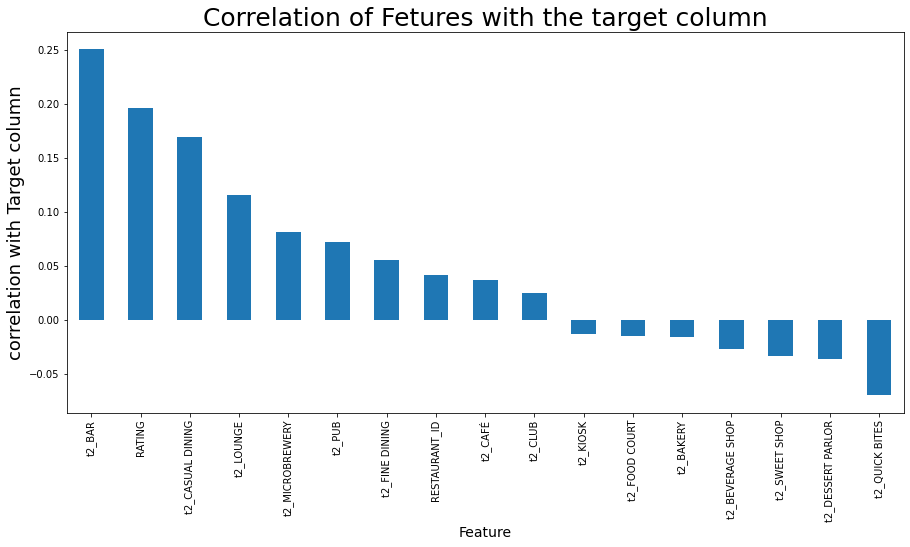

In [64]:
plt.figure(figsize=(15,7))
DF.corr()["COST"].sort_values(ascending=False).drop(["COST"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

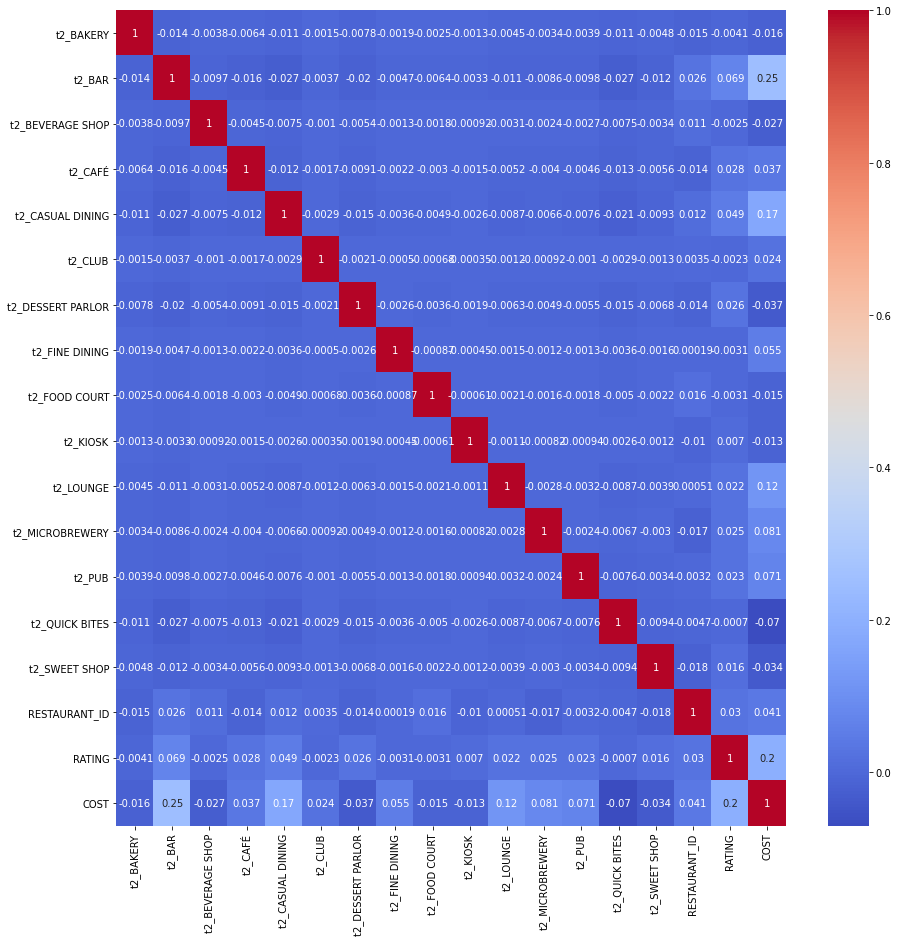

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(DF.corr(), annot = True, cmap = "coolwarm")
plt.show()

Key Observation:
>Above shows that we have more correlation with Rating votes and cost lets also filter and bring in city and location also into Picture.

In [66]:
DF.shape

(12665, 39)

In [67]:
len(df.LOCALITY.unique())

1417

In [68]:
len(df.CITY.unique())

360

In [69]:
LOC = df[["CITY","LOCALITY"]]

In [70]:
LOC.loc[LOC.CITY.isnull() & LOC.LOCALITY.notnull()]

CITY                                           LOCALITY
246    NaN                                 Palarivattom Kochi
817    NaN                             shop 7 shikrupa socity
5149   NaN                                        Navi Mumbai
5297   NaN                                              Kochi
6397   NaN                                            Alibaug
6451   NaN                                            Chennai
8456   NaN                                          Mathikere
8735   NaN                                            Chennai
9121   NaN                                          Bangalore
9268   NaN                                              Kochi
10200  NaN                                             Kalyan
10704  NaN                                            Chennai
11491  NaN                                            Chennai
12314  NaN  Opposite to corporation bank and LIC office ba...
12447  NaN                                          Hyderabad

In [71]:
LOC.loc[LOC.LOCALITY.str.startswith('Opposite to corporation bank and LIC office') ==True]


CITY                                           LOCALITY
12314  NaN  Opposite to corporation bank and LIC office ba...

In [72]:
LOC.loc[LOC.LOCALITY == 'Chennai',"CITY"] = "Chennai"
LOC.loc[LOC.LOCALITY == 'Palarivattom Kochi',"CITY"] = "Kochi"
LOC.loc[LOC.LOCALITY == 'Kochi',"CITY"] = "Kochi"
LOC.loc[LOC.LOCALITY == 'Navi Mumbai',"CITY"] = "Navi Mumbai"
LOC.loc[LOC.LOCALITY == 'Bangalore',"CITY"] = "Bangalore"
LOC.loc[LOC.LOCALITY == 'Alibaug',"CITY"] = "Alibaug"
LOC.loc[LOC.LOCALITY == 'Mathikere',"CITY"] = "Bangalore"
LOC.loc[LOC.LOCALITY == 'Hyderabad',"CITY"] = "Hyderabad"
LOC.loc[LOC.LOCALITY == 'Kalyan',"CITY"] = "Bangalore"
LOC.loc[(LOC.LOCALITY == 'shop 7 shikrupa socity' ),"CITY"] = "not_traceable"
LOC.loc[(LOC.LOCALITY == " Opposite to corporation bank and LIC office ba...")] = "not_traceable"

Using locality we are filling City missing values

In [73]:
LOC.CITY.replace(np.nan,"WAKANDA", inplace = True) # we are further replacing the missing values with WAKANDA 

In [74]:
LOC.isna().sum()

CITY         0
LOCALITY    98
dtype: int64

In [75]:
LOC.CITY.unique(),"\n\n\n", LOC.LOCALITY.unique(), len( LOC.LOCALITY.unique())

(array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
        'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
        'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
        'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
        'Secunderabad', 'WAKANDA', 'India', 'Madhuranagar',
        'Chennai Teynampet', 'Faridabad', 'Chembur.', 'Maharashtra',
        'opp gurudwara Shakurpur', 'Telagana Land Line:040-48507016',
        'Ghaziabad', 'Karnataka', 'Kerala', 'Edappally', 'Kadavanthra',
        'Ernakulam Circle kochi', 'Bengalore', 'Near Reliance Fresh',
        'Kilpauk', 'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
        'Kakkanad', 'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
        'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
        'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri', 'not_traceable',
        '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
        'Mumbai

In [76]:
old= [i for i in LOC.CITY.unique()]

In [77]:
new = ['Thane','Chennai','Mumbai','Bangalore','Gurgaon','Hyderabad','Kochi','Thane','Mumbai','New Delhi','Mumbai','Mumbai',
       'Kochi','Bangalore','Navi Mumbai','Mumbai','Delhi','Noida','Bangalore','Secunderabad','WAKANDA','India','Hyderabad',
       'Chennai','Faridabad','Mumbai','Maharashtra','Delhi','Hyderabad','Ghaziabad','Karnataka','Kochi','Kochi','Kochi',
       'Kochi','Bangalore','Near Reliance Fresh','Chennai','Bangalore','Hyderabad','Mumbai','Bangalore','Kochi','Kochi',
       'Bangalore','Mumbai','Secunderabad','Hyderabad','Kochi','Hyderabad','Chennai','not_traceable','Bangalore','Mumbai',
       'Mumbai','Mumbai','Kochi','Mumbai','Tamil Nadu','Kochi','Chennai','Gurugram','Noida','Kochi','Chennai','Chennai',
       'Bangalore','Delhi','Delhi','Kochi','Mumbai','Chennai','Hyderabad','Hyderabad','Hyderabad','Chennai','Chennai','Chennai',
       'Bangalore','Chennai','Hyderabad','Chennai','Bangalore','Hyderabad','Kochi','Bangalore','Bangalore','Kochi','Kochi',
       'Bangalore','Delhi','Hyderabad','Hyderabad','Navi Mumbai','New Delhi','Chennai','Kochi','Noida','Bangalore','Secunderabad',
       'Kochi','Mumbai','Hyderabad','Secunderabad','Mumbai','Chennai','New Delhi','Kochi','Bangalore','Mumbai','Delhi','Mumbai',
       'Bangalore','Secunderabad','Chennai','New Delhi','Chennai','Bangalore','Kochi','Hyderabad','Kochi','Bangalore','Mumbai',
       'Mumbai','Mumbai','Bangalore','Chennai','Hyderabad','Kochi','Hyderabad','Bangalore','Mumbai','Chennai','Chennai','Chennai',
       'New Delhi','Bangalore','Mumbai','Kochi','Bangalore','Bangalore','Hyderabad','Bangalore','Mumbai','Road 3','Hyderabad',
       'Delhi','Hyderabad','Chennai','Bangalore','Bangalore','Mumbai','Chennai','Chennai','Chennai','Chennai','Hyderabad','Mumbai',
       'Chennai','Mumbai','Hyderabad','Mumbai','New Delhi','Chennai','Mumbai','Thane','Hyderabad','Bangalore','Bangalore',
       'New Delhi','Secunderabad','Bangalore','Bangalore','Navi Mumbai','Hyderabad','Bangalore','Chennai','ward X11','Kochi',
       'Kochi','Mumbai','Chennai','Thane','Uttar Pradesh','Bangalore','Mumbai','Faridabad','Bangalore','Near Bharat Petroleum.',
       'Chennai','Chennai','Mumbai','Kochi','Hyderabad','Thrissur','Mumbai','Bangalore','Kochi','Hyderabad','Mumbai','ECIL',
       'Hyderabad','New Delhi','Chennai','Kochi','Mumbai','Chennai','Secunderabad','Gurgaon','Kochi','Mumbai','Noida','Mumbai',
       'Chennai','Chennai','3rd Street','Mumbai','Mumbai','Delhi','Kochi','Delhi','Sector 51','Hyderabad','Chennai','Bangalore',
       'Mumbai','Chennai', 'Hyderabad','Mumbai','Hyderabad','Noida','Chennai','Hyderabad','Mumbai','Hyderabad','Bangalore',
       'Gurgaon','Kochi','Kochi','Hyderabad','Kochi','Chennai','Chennai','Chennai','Chennai','Delhi','Kochi','Mumbai',
       'Bangalore','Chennai','Chennai','Bangalore','Chennai','Chennai','Gurgaon','Mumbai','Bangalore','Kochi','Mumbai',
       'New Delhi','Hyderabad','Hyderabad','Chennai','Chennai','Delhi','Thane','Bangalore','Kochi','Kochi','First Street',
       'Chennai','New Delhi','Bangalore','Chennai','Ghaziabad','Bangalore','Block F','Delhi','Opposite Barathi Gas Company',
       'Chennai','Hyderabad','Mumbai','Kochi','Chennai','Hyderabad','Bangalore','Bangalore','Bangalore','Kochi','Chennai',
       'Mumbai','Mumbai','Kochi','Chennai','Chennai','Navi Mumbai','Chennai','Bangalore','Haridwar Apartments','Bangalore',
       'Kochi','Chennai','Ghaziabad','Hyderabad','Secunderabad','Bangalore','Bangalore','Chennai','Kochi','Lahari Apartments',
       'Hyderabad','Mumbai','Delhi','New Delhi','Kochi','Bangalore','Hyderabad','Mumbai','10th avenue','Hyderabad','New Delhi',
       'Hyderabad','Bangalore','Bangalore','Delhi','Gurgaon','Chennai','Kochi','New Delhi','Secunderabad','Chennai','Bangalore',
       'Chennai','Bangalore','Chennai','New Delhi','Bangalore','Kochi','Kochi','Mumbai','Bangalore','Mumbai','Kochi','Haryana',
       'Mumbai','Gurgaon','Mumbai','Bangalore','Chennai','Hyderabad',]

Using the information in old we are giving common names for CITY in new list.
There is also some missing values in CITY we are replacing that with WAKANDA(it is no place in real).
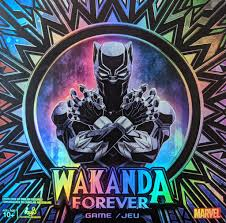

In [78]:
LOC.CITY.replace(old,new,inplace = True)

In [79]:
LOC.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'New Delhi', 'Navi Mumbai', 'Delhi', 'Noida',
       'Secunderabad', 'WAKANDA', 'India', 'Faridabad', 'Maharashtra',
       'Ghaziabad', 'Karnataka', 'Near Reliance Fresh', 'not_traceable',
       'Tamil Nadu', 'Gurugram', 'Road 3', 'ward X11', 'Uttar Pradesh',
       'Near Bharat Petroleum.', 'Thrissur', 'ECIL', '3rd Street',
       'Sector 51', 'First Street', 'Block F',
       'Opposite Barathi Gas Company', 'Haridwar Apartments',
       'Lahari Apartments', '10th avenue', 'Haryana'], dtype=object)

In [80]:
unfindable = ['Karnataka','Near Reliance Fresh','not_traceable','Tamil Nadu','Road 3','ward X11','Uttar Pradesh',
              'Near Bharat Petroleum.','ECIL','3rd Street','Sector 51','First Street','Block F','Opposite Barathi Gas Company',
              'Haridwar Apartments','Lahari Apartments','10th avenue','Haryana',]
clue = []
for i in unfindable:
    clue.append(LOC.loc[LOC.CITY == i,"LOCALITY"][0:1])

In [81]:
clue

[345    Bengaluru
 Name: LOCALITY, dtype: object,
 462    Edappally Toll - Pookkattupady Road
 Name: LOCALITY, dtype: object,
 817    shop 7 shikrupa socity
 Name: LOCALITY, dtype: object,
 892    Chennai-600040
 Name: LOCALITY, dtype: object,
 4149    Apollo road
 Name: LOCALITY, dtype: object,
 5385    MPL 6303
 Name: LOCALITY, dtype: object,
 5578    Noida
 Name: LOCALITY, dtype: object,
 5701    Opposite Glomax Mall
 Name: LOCALITY, dtype: object,
 5960    Gusaiguda
 Name: LOCALITY, dtype: object,
 6779    Old Door AA24 AA Block
 Name: LOCALITY, dtype: object,
 6979    D block
 Name: LOCALITY, dtype: object,
 8864    Thirveedhi Amman Kovil Street
 Name: LOCALITY, dtype: object,
 9326    New Shopping Complex
 Name: LOCALITY, dtype: object,
 9441    Nsc Bose Road
 Name: LOCALITY, dtype: object,
 10533    Old Safilguda
 Name: LOCALITY, dtype: object,
 10874    Opposite Tilak Nagar hospital
 Name: LOCALITY, dtype: object,
 11296    Saane Apartment
 Name: LOCALITY, dtype: object,
 12286

Again using the information from location we are changing names in CITY columns..

In [82]:
 clue = ["Bengaluru",'Kochi','Mumbai','Chennai','Apollo road','MPL','Noida','Opposite Glomax Mall','Hyderabad',
        'Old Door AA24 AA Block','D block','Chennai','New Shopping Complex','Chennai','Hyderabad','Hyderabad',
        'Saane Apartment','Gurugram']


In [83]:
LOC.CITY.replace(unfindable,clue,inplace = True)

In [84]:
LOC.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'New Delhi', 'Navi Mumbai', 'Delhi', 'Noida',
       'Secunderabad', 'WAKANDA', 'India', 'Faridabad', 'Maharashtra',
       'Ghaziabad', 'Bengaluru', 'Gurugram', 'Apollo road', 'MPL',
       'Opposite Glomax Mall', 'Thrissur', 'Old Door AA24 AA Block',
       'D block', 'New Shopping Complex', 'Saane Apartment'], dtype=object)

In [85]:
LOC.loc[LOC.CITY == "India","LOCALITY"]

135                                       Telangana 500084
1853     HS-6 Kailash Colony Market Greater Kailash-1 D...
2096                                         Kerala 683101
2169                                        Haryana 121001
4195                                      Telangana 500053
4604                                         Kerala 682003
4763                                         Kerala 682006
5632                                         Kerala 682024
5778                                         Kerala 682006
5919                                         Kerala 682024
6758                                         Kerala 682010
6819                                      Telangana 500055
6844                                      Telangana 500055
7251                                      Telangana 500025
7679                                         Kerala 683501
8423                                         Kerala 682022
8433                                         Kerala 6820

In [86]:
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("Telangana") ),"CITY"] = "Hyderabad"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("Kerala") ),"CITY"] = "Kochi"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("Haryana") ),"CITY"] = "Faridabad"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("110009") ),"CITY"] = "Delhi"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("HS-6") ),"CITY"] = "New Delhi"

In [87]:
LOC.drop("LOCALITY", axis=1, inplace = True) 
# we are droping locality since the information are wery cluttery and also we have correctly cleared city

In [88]:
LOC.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'New Delhi', 'Navi Mumbai', 'Delhi', 'Noida',
       'Secunderabad', 'WAKANDA', 'Faridabad', 'Maharashtra', 'Ghaziabad',
       'Bengaluru', 'Gurugram', 'Apollo road', 'MPL',
       'Opposite Glomax Mall', 'Thrissur', 'Old Door AA24 AA Block',
       'D block', 'New Shopping Complex', 'Saane Apartment'], dtype=object)

In [89]:
DF=DF.join(LOC)

In [90]:
DF

Title1  t2_BAKERY  t2_BAR  t2_BEVERAGE SHOP  t2_CAFÉ  \
0       CASUAL DINING          0       0                 0        0   
1       CASUAL DINING          0       1                 0        0   
2       CASUAL DINING          0       0                 0        0   
3         QUICK BITES          0       0                 0        0   
4      DESSERT PARLOR          0       0                 0        0   
...               ...        ...     ...               ...      ...   
12685     QUICK BITES          0       0                 0        0   
12686   CASUAL DINING          0       1                 0        0   
12687          LOUNGE          0       0                 0        0   
12688   CASUAL DINING          0       0                 0        0   
12689   CASUAL DINING          0       0                 0        0   

       t2_CASUAL DINING  t2_CLUB  t2_DESSERT PARLOR  t2_FINE DINING  \
0                     0        0                  0               0   
1                     0        0                  0               0   
2                     0        0                  0               0   
3                     0        0                  0               0   
4                     0        0                  0               0   
...                 ...      ...                ...             ...   
12685                 0        0                  0               0   
12686                 0        0                  0               0   
12687                 0        0                  0               0   
12688                 0        0                  0               0   
12689                 0        0                  0               0   

       t2_FOOD COURT  ...  Day_2  Day_3  Day_4  Day_5  Day_6  Day_7  RATING  \
0                  0  ...      -      -      -      -      -    Sun     3.6   
1                  0  ...      -      -      -      -      -    Sun     4.2   
2                  0  ...      -      -      -      -      -    Sun     3.8   
3                  0  ...      -      -      -      -      -    Sun     4.1   
4                  0  ...      -      -      -      -      -    Sun     3.8   
...              ...  ...    ...    ...    ...    ...    ...    ...     ...   
12685              0  ...    Tue    Wed    Thu    Sun      -      -     3.8   
12686              0  ...      -      -      -      -      -    Fri     4.3   
12687              0  ...      -      -      -      -      -    Sun     4.0   
12688              0  ...      -      -      -      -      -    Sun     3.5   
12689              0  ...      -      -      -      -      -    Sun     3.4   

       VOTES  COST         CITY  
0        49   1200        Thane  
1        30   1500      Chennai  
2       221    800      Chennai  
3        24    800       Mumbai  
4       165    300       Mumbai  
...      ...   ...          ...  
12685   546    500    Hyderabad  
12686  1214   1800       Mumbai  
12687   608   1300  Navi Mumbai  
12688    32    400      Chennai  
12689   677    600    Hyderabad  

[12665 rows x 40 columns]

#### WE ARE DONE WITH CLEANING OUR DATA SET LETS START THE UNIVARIATE ANALYSIS

In [91]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 12689
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title1             12665 non-null  object 
 1   t2_BAKERY          12665 non-null  uint8  
 2   t2_BAR             12665 non-null  uint8  
 3   t2_BEVERAGE SHOP   12665 non-null  uint8  
 4   t2_CAFÉ            12665 non-null  uint8  
 5   t2_CASUAL DINING   12665 non-null  uint8  
 6   t2_CLUB            12665 non-null  uint8  
 7   t2_DESSERT PARLOR  12665 non-null  uint8  
 8   t2_FINE DINING     12665 non-null  uint8  
 9   t2_FOOD COURT      12665 non-null  uint8  
 10  t2_KIOSK           12665 non-null  uint8  
 11  t2_LOUNGE          12665 non-null  uint8  
 12  t2_MICROBREWERY    12665 non-null  uint8  
 13  t2_PUB             12665 non-null  uint8  
 14  t2_QUICK BITES     12665 non-null  uint8  
 15  t2_SWEET SHOP      12665 non-null  uint8  
 16  RESTAURANT_ID      126

In [92]:
DF.VOTES = DF.VOTES.astype("float64")

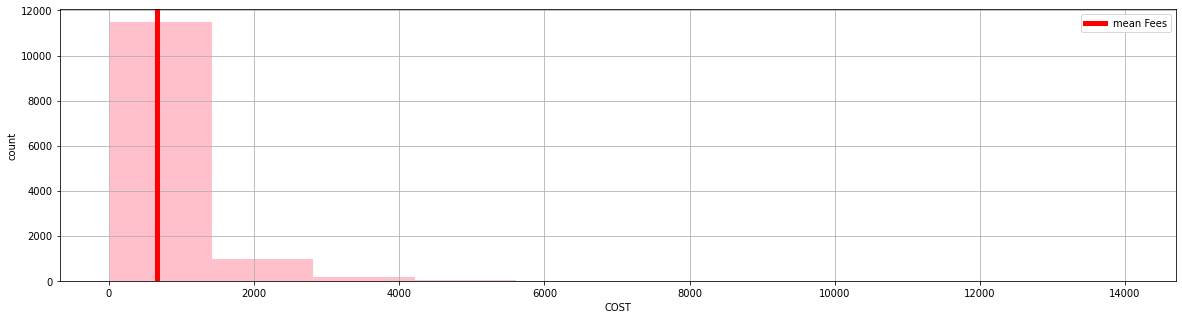

MATHEMATICAL SUMMARY OF COST :
 count    12665.000000
mean       655.400711
std        627.389909
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64


In [93]:
DF.COST.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(df.COST), linewidth = 5, color = "red", label = "mean Fees")
plt.xlabel("COST")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF COST :\n",\
      DF.COST.describe())

#### Key Observation:
> From above we can see that most of the restaurant charges within Rs: 1500/- per dine with average of 655 and surprisingly minimum cost is only Rs: 20/- but max is Rs: 14000/-.

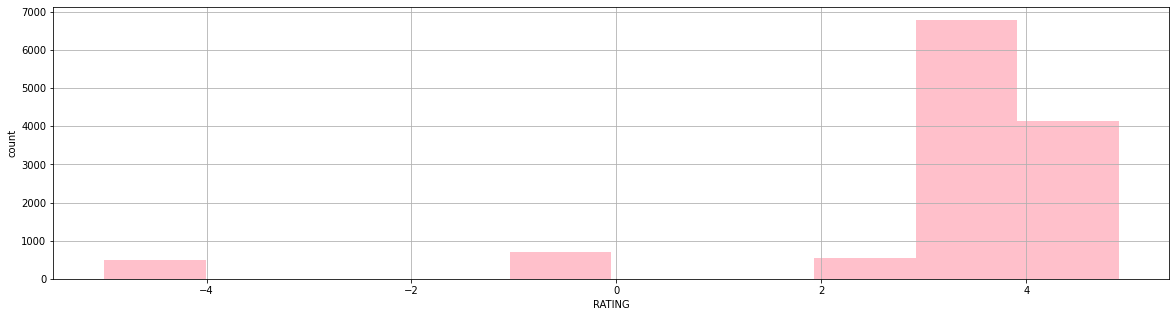

MATHEMATICAL SUMMARY OF RATING :
 count    12665.000000
mean         3.175199
std          2.021152
min         -5.000000
25%          3.400000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64


In [94]:
DF.RATING.hist(bins =10,figsize=(20,5), color ="pink")
plt.xlabel("RATING")
plt.ylabel("count")
plt.show()
print("MATHEMATICAL SUMMARY OF RATING :\n",\
      DF.RATING.describe())

#### We can see the most of the restaurant share the ratings between 3-4 and highest being 4.9

In [95]:
DF.VOTES.dtype

dtype('float64')

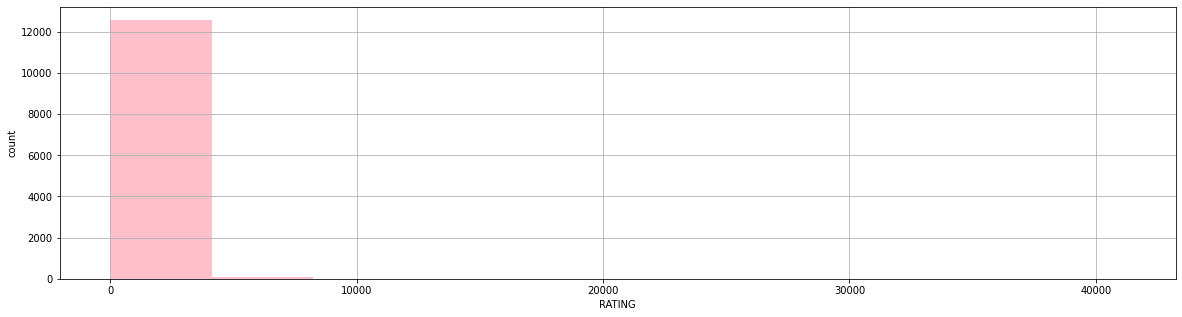

MATHEMATICAL SUMMARY OF VOTES :
 count    12665.000000
mean       376.242637
std        811.549378
min          0.000000
25%         39.000000
50%        132.000000
75%        405.000000
max      41186.000000
Name: VOTES, dtype: float64


In [96]:
DF.VOTES.hist(bins =10,figsize=(20,5), color ="pink")
plt.xlabel("RATING")
plt.ylabel("count")
plt.show()
print("MATHEMATICAL SUMMARY OF VOTES :\n",\
      DF.VOTES.describe())

most of the votes are between 0 - 400 with mean of 376 higest being 41186 

#### Multivariate Analysis:


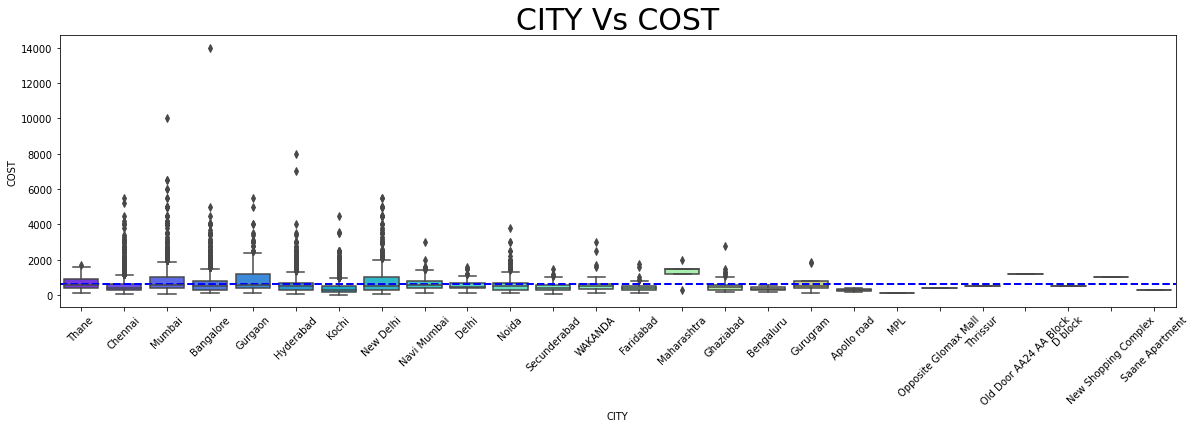

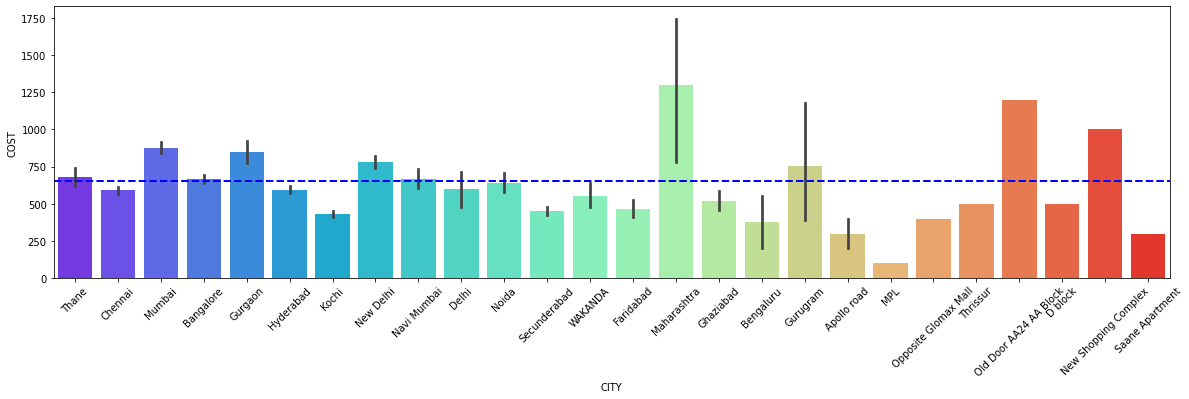

In [97]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.COST)
sns.boxplot(x = "CITY",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("CITY Vs COST", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "CITY",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key Observation:
    1. Banglore charges the highest of Rs: 14000/- per Dine.
    2. Maharashtra over all population of Restraunt charges above the mean and also the total cost of all restraunt put together being the highest in the country.
    3. Most of the cities are around the mean. 
    4. Wakanda(unknown) charges lesser than the mean. Which is in Wakanda restraunts are not charging high for food.
    
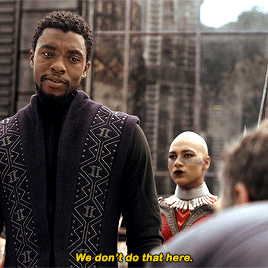

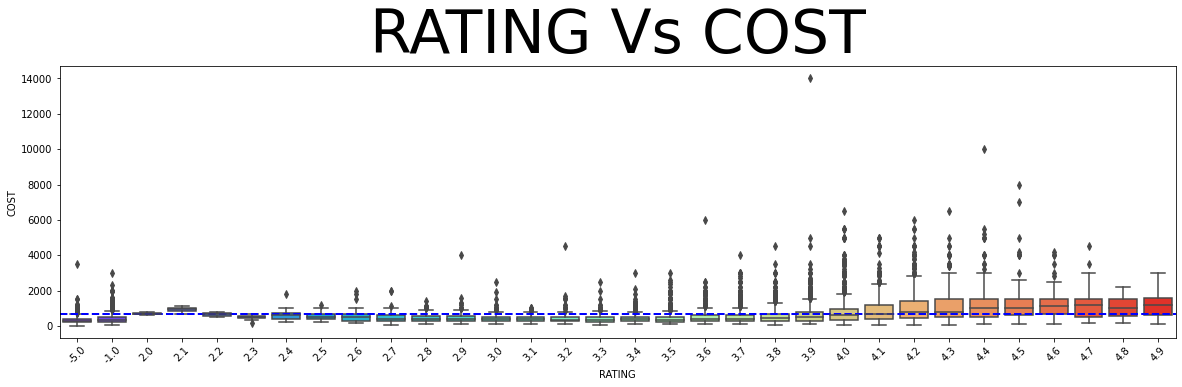

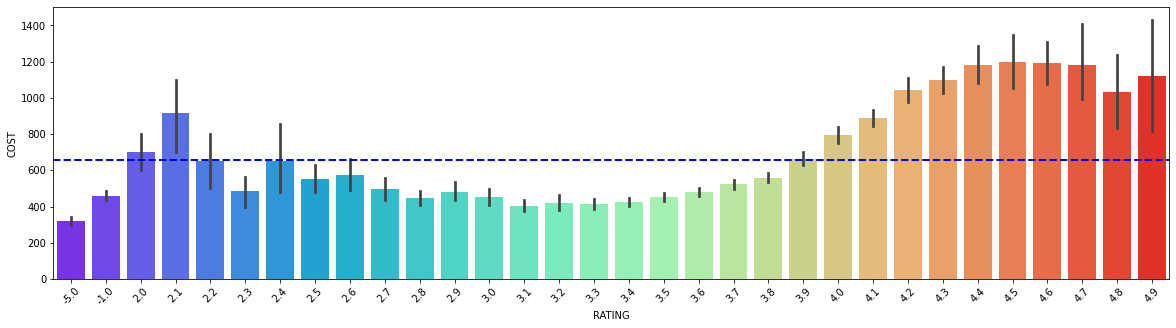

In [98]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.COST)
sns.boxplot(x = "RATING",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("RATING Vs COST", fontsize = 60)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "RATING",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

#### Key observation:
    1. We can see as per the Rating increase the cost also increases.
    2. The Mediocre rated restraunt actually charges lesser but they are actually lesser in number.
    3. Missing valued Restraut and new restraunt charges lesser.

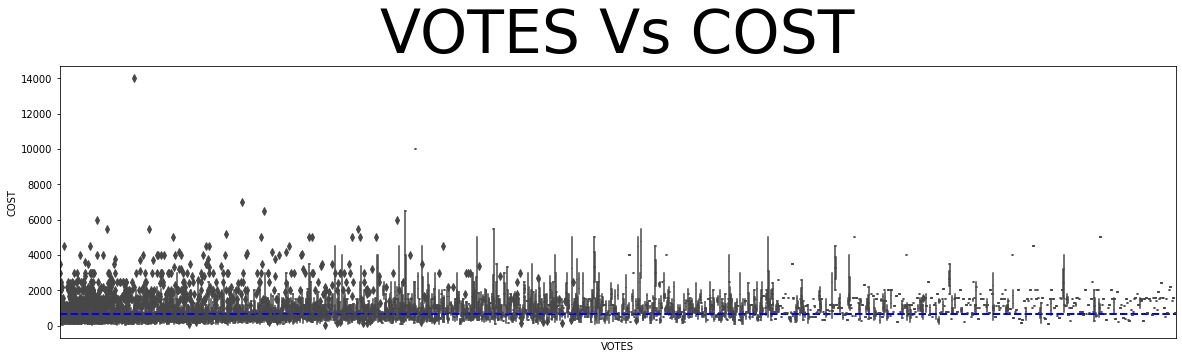

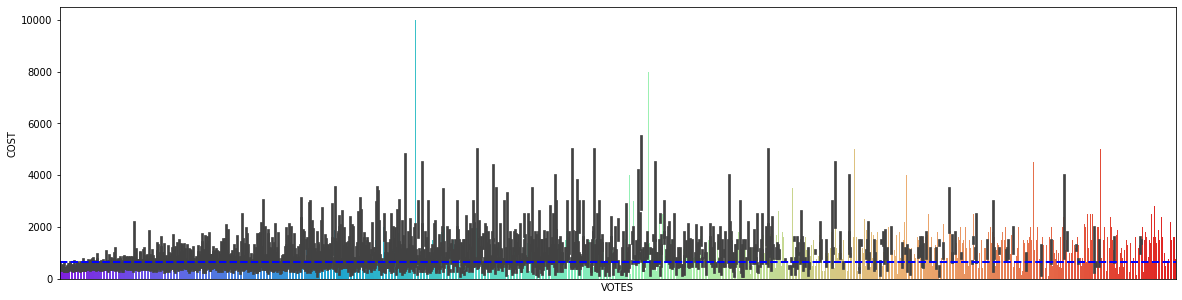

In [99]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.COST)
sns.boxplot(x = "VOTES",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VOTES Vs COST", fontsize = 60)
plt.xticks([])
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VOTES",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks([])
plt.show()

### Key observation:
    1. Above shows that the restraunt with lesser votes charges more and restraunt with high votes charges aronund the mean. 

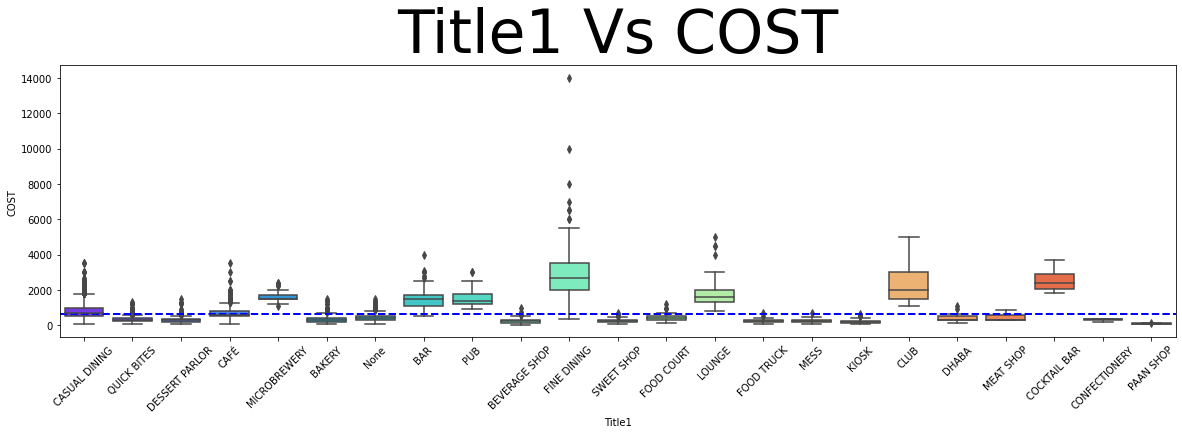

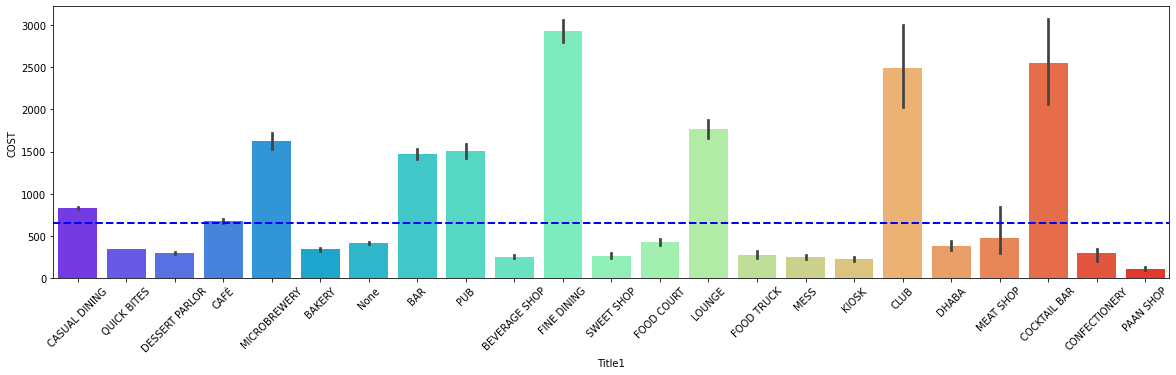

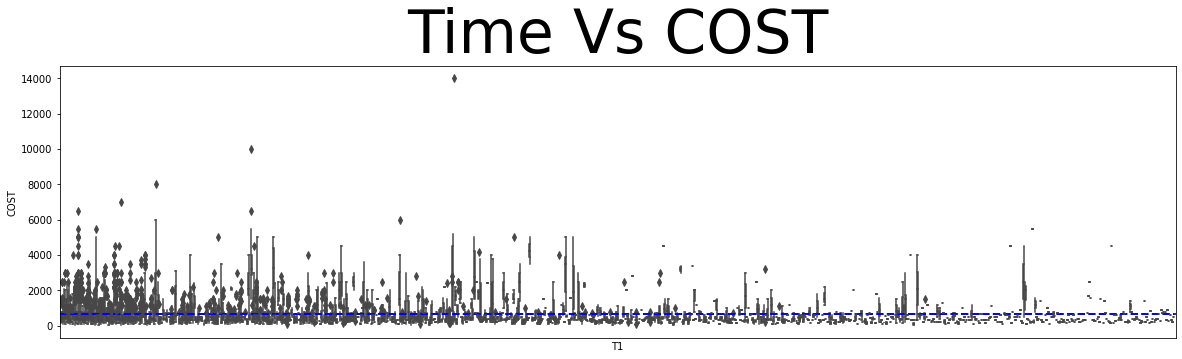

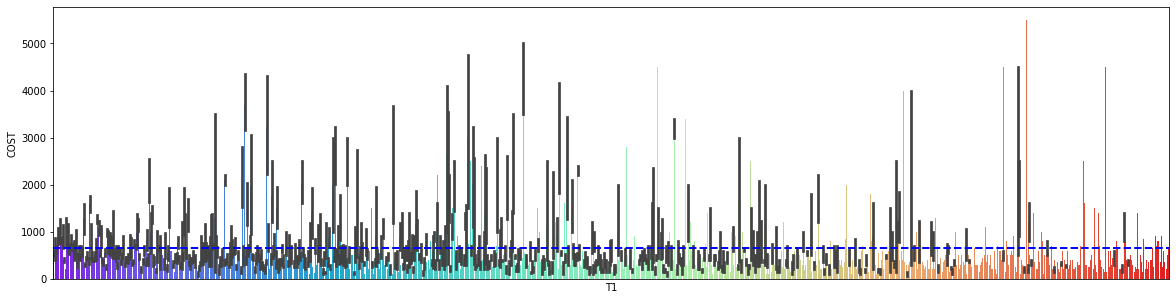

In [100]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.COST)
sns.boxplot(x = "Title1",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("Title1 Vs COST", fontsize = 60)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "Title1",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.COST)
sns.boxplot(x = "T1",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("Time Vs COST", fontsize = 60)
plt.xticks([])
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "T1",y = "COST", data = DF, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks([])
plt.show()

# Key observation:
    1. From above we can say that Fine Dine Type of restraunt is costilier than others.
    2. At the Prime hours the restraunt are charging more.
    
>From all our above observation we can tell our story that restraunt in Bangalore with 3.9 rating with very lesser votes Fine dine type cussine at the prime time is charging RS: 14000/ - per dine    

Restraunt_ID clearly have no relationship here so we will drop the same

In [101]:
DF.drop("RESTAURANT_ID", axis = 1, inplace = True)

#### Encoding the non numeric data with lable encoder:

In [102]:
clos = DF.columns
nums_clos = DF._get_numeric_data().columns

Cat_col = list(set(clos)-set(nums_clos))
Cat_col , nums_clos

(['CUS4',
  'T4',
  'Day_4',
  'CITY',
  'CUS6',
  'T1',
  'CUS2',
  'T2',
  'Title1',
  'CUS8',
  'Day_3',
  'Day_1',
  'Day_6',
  'Day_2',
  'CUS1',
  'CUS7',
  'Day_7',
  'CUS5',
  'T3',
  'CUS3',
  'Day_5'],
 Index(['t2_BAKERY', 't2_BAR', 't2_BEVERAGE SHOP', 't2_CAFÉ',
        't2_CASUAL DINING', 't2_CLUB', 't2_DESSERT PARLOR', 't2_FINE DINING',
        't2_FOOD COURT', 't2_KIOSK', 't2_LOUNGE', 't2_MICROBREWERY', 't2_PUB',
        't2_QUICK BITES', 't2_SWEET SHOP', 'RATING', 'VOTES', 'COST'],
       dtype='object'))

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in Cat_col:
    DF[i] = le.fit_transform(DF[i])
    
DF

Title1  t2_BAKERY  t2_BAR  t2_BEVERAGE SHOP  t2_CAFÉ  t2_CASUAL DINING  \
0           4          0       0                 0        0                 0   
1           4          0       1                 0        0                 0   
2           4          0       0                 0        0                 0   
3          21          0       0                 0        0                 0   
4           8          0       0                 0        0                 0   
...       ...        ...     ...               ...      ...               ...   
12685      21          0       0                 0        0                 0   
12686       4          0       1                 0        0                 0   
12687      14          0       0                 0        0                 0   
12688       4          0       0                 0        0                 0   
12689       4          0       0                 0        0                 0   

       t2_CLUB  t2_DESSERT PARLOR  t2_FINE DINING  t2_FOOD COURT  ...  Day_2  \
0            0                  0               0              0  ...      6   
1            0                  0               0              0  ...      6   
2            0                  0               0              0  ...      6   
3            0                  0               0              0  ...      6   
4            0                  0               0              0  ...      6   
...        ...                ...             ...            ...  ...    ...   
12685        0                  0               0              0  ...      4   
12686        0                  0               0              0  ...      6   
12687        0                  0               0              0  ...      6   
12688        0                  0               0              0  ...      6   
12689        0                  0               0              0  ...      6   

       Day_3  Day_4  Day_5  Day_6  Day_7  RATING   VOTES  COST  CITY  
0          5      4      3      1      3     3.6    49.0  1200    23  
1          5      4      3      1      3     4.2    30.0  1500     3  
2          5      4      3      1      3     3.8   221.0   800     3  
3          5      4      3      1      3     4.1    24.0   800    14  
4          5      4      3      1      3     3.8   165.0   300    14  
...      ...    ...    ...    ...    ...     ...     ...   ...   ...  
12685      4      3      2      1      0     3.8   546.0   500    10  
12686      5      4      3      1      1     4.3  1214.0  1800    14  
12687      5      4      3      1      3     4.0   608.0  1300    15  
12688      5      4      3      1      3     3.5    32.0   400     3  
12689      5      4      3      1      3     3.4   677.0   600    10  

[12665 rows x 39 columns]

### Lets observe the skewness and outliers in the Data.

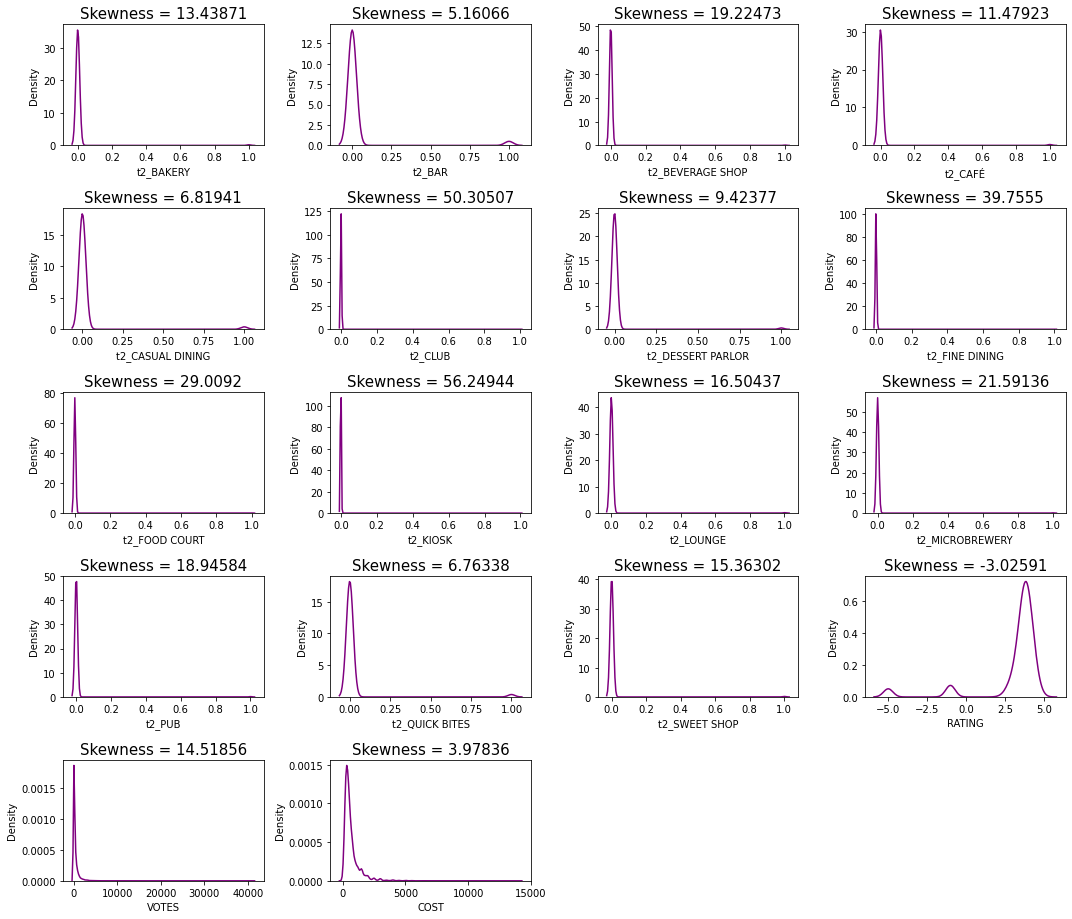

In [104]:
plt.figure(figsize=(15,15))
for i in range (0, len(nums_clos)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[nums_clos[i]], color = "purple")
    plt.title(f"Skewness = {round(DF[nums_clos[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

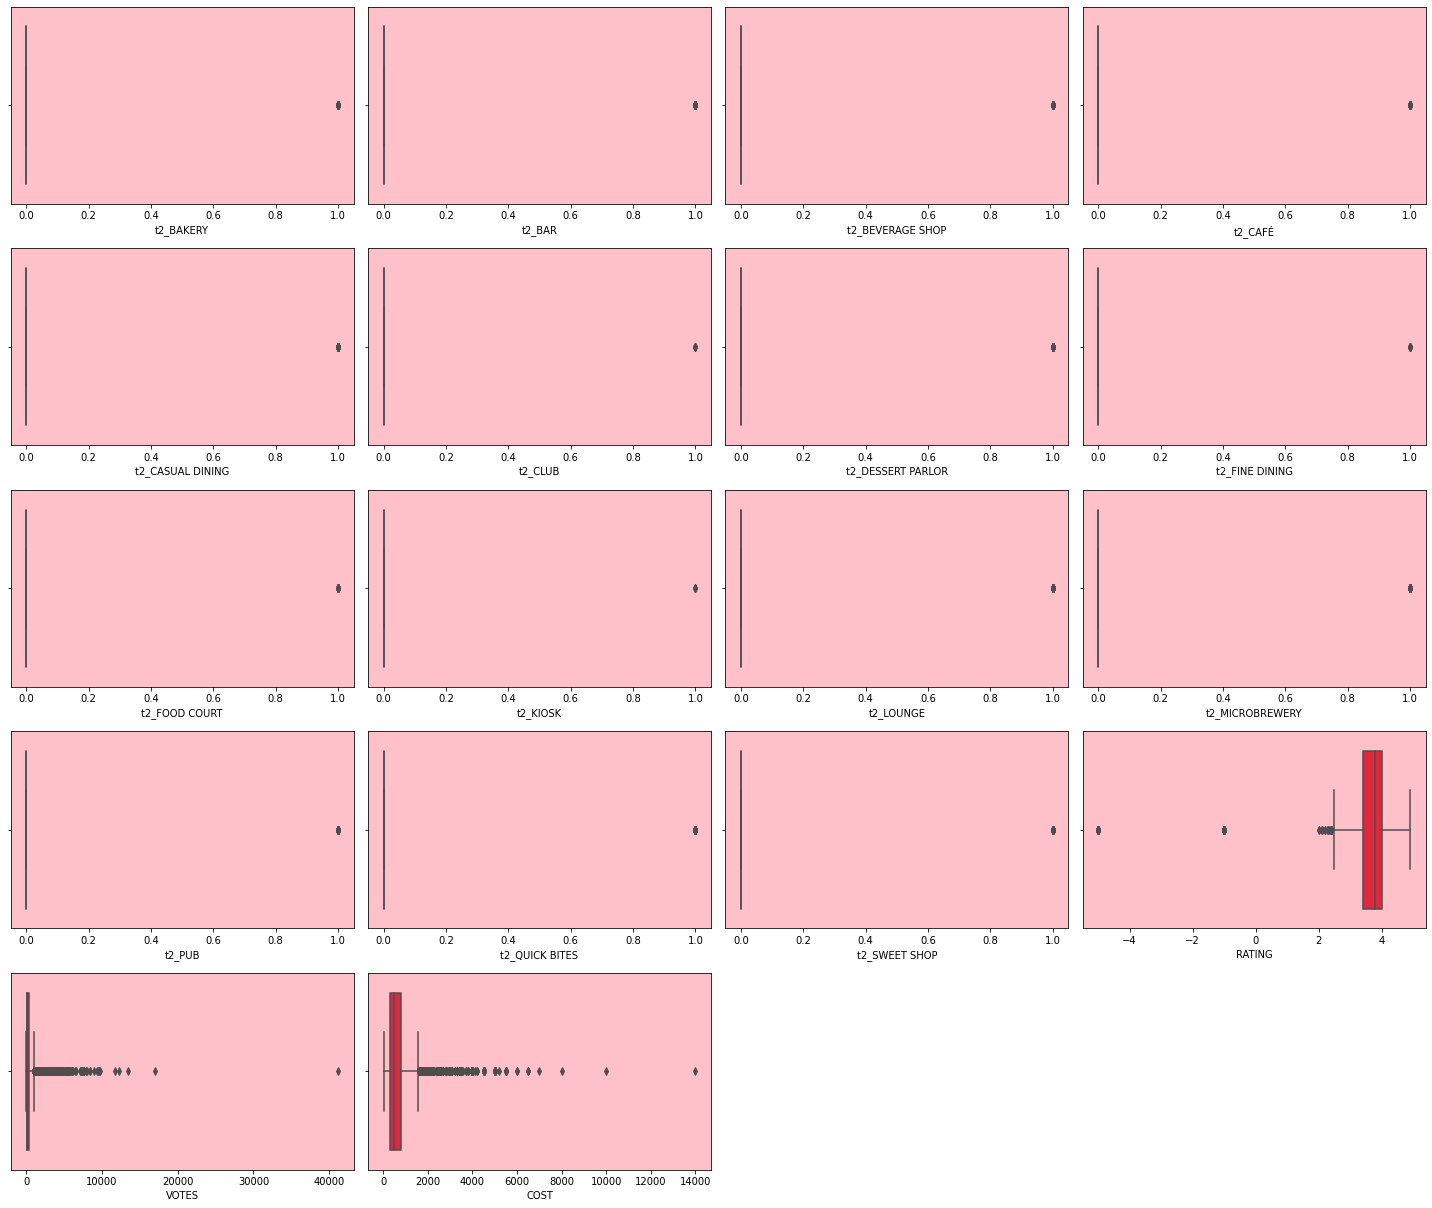

In [105]:
plt.figure(figsize=(20,50))
for i in range (0, len(nums_clos)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(DF[nums_clos[i]], color = "#fb0a29" , orient = "h")
    ax.set_facecolor("#fec1c9")
    plt.tight_layout()

Data have too much skewness and outliers and correcting them will change our data we will use powertransform method then we will train our model.

In [106]:
x_1=DF.drop(["COST"], axis = 1)
y_1=DF.COST

In [107]:
from sklearn.preprocessing import power_transform
x_1=power_transform(x_1,method="yeo-johnson")
x_1 

array([[-0.83901897, -0.07401304, -0.18701843, ..., -0.04927685,
        -0.49901906,  1.82143787],
       [-0.83901897, -0.07401304,  5.34706663, ...,  0.88000893,
        -0.71922415, -0.95196284],
       [-0.83901897, -0.07401304, -0.18701843, ...,  0.23972418,
         0.29762039, -0.95196284],
       ...,
       [ 0.47528581, -0.07401304, -0.18701843, ...,  0.54930149,
         0.94664211,  0.94271802],
       [-0.83901897, -0.07401304, -0.18701843, ..., -0.18623655,
        -0.69130836, -0.95196284],
       [-0.83901897, -0.07401304, -0.18701843, ..., -0.31826357,
         1.02158917,  0.28463586]])

In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 32.65218189498008 found on randomstate 556


In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [110]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [111]:

models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [112]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.2505914593060429

ERROR:
MEAN ABSOLUTE ERROR:  286.5898343013989
MEAN SQUARED ERROR:  226440.49669467914
ROOT MEAN SQUARED ERROR : 475.85764330803715
R2 SCORE:  0.3265218189498008
**********************************************************************************************************



Score of Lasso() is: 0.25035441165375183

ERROR:
MEAN ABSOLUTE ERROR:  286.46538323205266
MEAN SQUARED ERROR:  226735.92396799172
ROOT MEAN SQUARED ERROR : 476.16795772919426
R2 SCORE:  0.3256431606463285
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.25059145261985305

ERROR:
MEAN ABSOLUTE ERROR:  286.58813245961517
MEAN SQUARED ERROR:  226441.20372240493
ROOT MEAN SQUARED ERROR : 475.85838620581745
R2 SCORE:  0.3265197161115114
**********************************************************************************************************



Score of ElasticNet() 

In [113]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.22207031 0.25032535 0.28874106 0.25839704 0.30682479]
MEAN OF SCORE is : 0.2652717069633968
Standard Deviation : 0.029713580307032226
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.2217077  0.25004549 0.28996561 0.258341   0.30673742]
MEAN OF SCORE is : 0.26535944442536713
Standard Deviation : 0.03002282461634164
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.22206952 0.25032533 0.28874897 0.2583988  0.3068249 ]
MEAN OF SCORE is : 0.2652735049842211
Standard Deviation : 0.029715013308627802
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.21156335 0.23424372 0.28057368 0.2446617  0.28480546]
MEAN OF SC

In [114]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

MODEL     SCORE  CV_mean_score    CV_STD         MBE  \
8  RandomForestRegressor  0.959056       0.715856  0.038838  182.044105   
5    KNeighborsRegressor  0.603356       0.413735  0.027209  257.525734   
6  DecisionTreeRegressor  0.999694       0.404283  0.115743  247.787207   
1                  Lasso  0.250354       0.265359  0.030023  286.465383   
2                  Ridge  0.250591       0.265274  0.029715  286.588132   
0       LinearRegression  0.250591       0.265272  0.029714  286.589834   
3             ElasticNet  0.235966       0.251170  0.027905  292.957281   
4                    SVR  0.057973       0.067222  0.012830  296.905068   
7      AdaBoostRegressor -0.327724      -0.500642  0.384598  641.588820   

             MSE        RMSE        R2  
8   95006.232934  308.230811  0.717433  
5  194710.651089  441.260299  0.420893  
6  178421.944675  422.400219  0.469338  
1  226735.923968  476.167958  0.325643  
2  226441.203722  475.858386  0.326520  
0  226440.496695  475.857643  0.326522  
3  234975.807549  484.743032  0.301136  
4  304410.280648  551.733886  0.094624  
7  551536.970929  742.655351 -0.640378

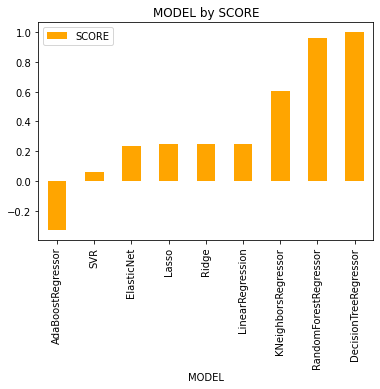

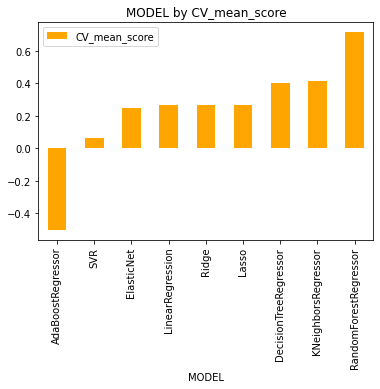

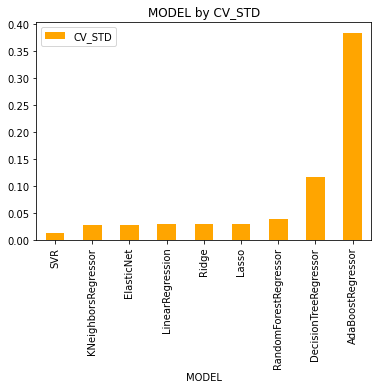

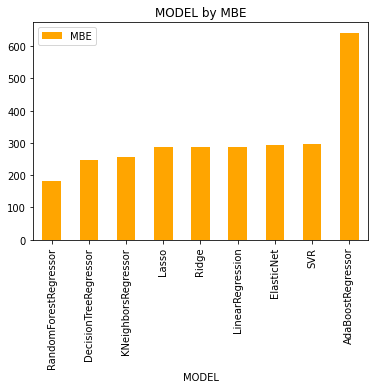

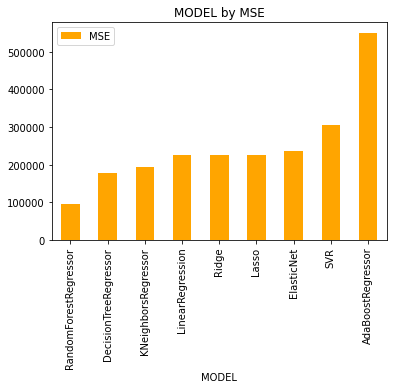

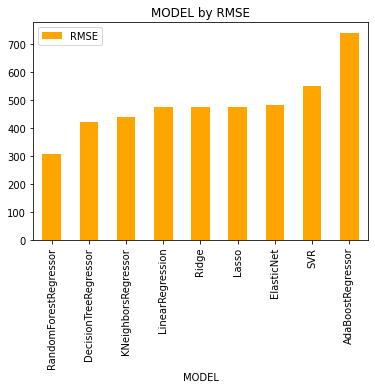

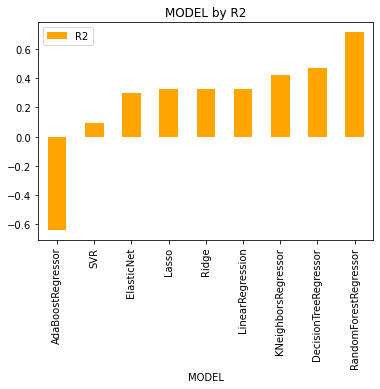

In [115]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From Above observation its is evident that Randomforest is the best model with Score of 0.96 and cv score of 71 lets try in Hyper tuning the same for improved performance.

##### HYPER PARAMETER TUNING...

In [116]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [117]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 64.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 215.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [120]:
grid_search.best_score_

0.7179102689100099

In [121]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 100}

In [122]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=8, random_state=42)

In [124]:
reg_final_model = grid_search.best_estimator_
preds = cross_val_predict(reg_final_model, x_train_1, y_train_1, cv=5, n_jobs=-1)
preds.mean()

659.5902142477552

In [125]:
reg_final_model.fit(x_train_1,y_train_1)

RandomForestRegressor(min_samples_split=8, random_state=42)

In [126]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.908284240528473, 0.7362337998030439)

#### Summary:

>We have cleansed our data and prepared for training on spliting it on Target and Feature variable. On training or data with 9 models we have finalize RandomForest Regressor with model score of 95% and with CV-Score of 71%. Further to increase the performance of our model we have hyper tuned our model with GridSearchCV and we have redused the overfitting our final model score is 0.908 with best_score_ of 0.717. We are saving our model on best_estimator_ for future prediction..

### Saving the model:

In [127]:
import joblib
joblib.dump(reg_final_model,"Restaurant_price_prediction.obj")

['Restaurant_price_prediction.obj']

#### Lets import and clean  Test data.

In [128]:
x_test = pd.read_excel("Data_Train.xlsx")
x_test

TITLE = x_test.TITLE

TITLE = TITLE.str.split(",")

t1 = TITLE.str[0]
t2 = TITLE.str[1]

TITLE = pd.DataFrame({"Title1": t1, "Title2": t2})
TITLE= pd.get_dummies(TITLE  ,columns=['Title2'], prefix=["t2"])

TITLE=TITLE[['Title1', 't2_BAKERY', 't2_BAR', 't2_BEVERAGE SHOP', 't2_CAFÉ',
       't2_CASUAL DINING', 't2_CLUB', 't2_DESSERT PARLOR',
       't2_FINE DINING', 't2_FOOD COURT', 't2_KIOSK', 't2_LOUNGE', 't2_MICROBREWERY', 't2_PUB',
       't2_QUICK BITES', 't2_SWEET SHOP']]

CUISINES= x_test.CUISINES 

CUISINES= CUISINES.str.split(",")
C1 = CUISINES.str[0]
C2 = CUISINES.str[1]
C3 = CUISINES.str[2]
C4 = CUISINES.str[3]
C5 = CUISINES.str[4]
C6 = CUISINES.str[5]
C7 = CUISINES.str[6]
C8 = CUISINES.str[7]

CUISINES = pd.DataFrame({"CUS1":C1,"CUS2": C2, "CUS3":C3,"CUS4": C4, "CUS5": C5, "CUS6":C6,"CUS7": C7, "CUS8": C8})
TIME = x_test.TIME 

TIME=TIME.str.split("(")
SCH=TIME.str[1]
SCH= SCH.str.split(")")
SCH1= SCH.str[0]
SCH1 = SCH1.str.split("-")
SCH_1 = SCH1.str[0]
SCH_2 = SCH1.str[1]

SCH_1.replace(['Mon, Wed, Thu, Fri...','Mon, Tue, Wed...','Mon, Wed, Thu...','Mon, Tue...','Mon, Tue, Wed, Thu...',
               'Mon, Wed, Thu, Fri, Sat...','Mon, Tue, Thu, Fri...','Mon, Tue, Wed, Thu, Sat...','Mon, Wed...',
               'Mon, Tue, Wed, Fri, Sat...','Mon, Tue, Wed, Sat...','Mon, Tue, Thu...','Mon, Tue, Wed, Fri...','Mon, Thu...',                        
               'Mon, Sat...','Mon, Tue, Fri...'] , ['Mon, Wed, Thu, Fri','Mon, Tue, Wed','Mon, Wed, Thu','Mon, Tue',
                                                    'Mon, Tue, Wed, Thu','Mon, Wed, Thu, Fri, Sat','Mon, Tue, Thu, Fri',
                                                    'Mon, Tue, Wed, Thu, Sat', 'Mon, Wed','Mon, Tue, Wed, Fri, Sat',         
                                                    'Mon, Tue, Wed, Sat','Mon, Tue, Thu','Mon, Tue, Wed, Fri',              
                                                    'Mon, Thu','Mon, Sat','Mon, Tue, Fri'],inplace = True)

SCH_1 = SCH_1.str.split(",")
Day_1 = SCH_1.str[0]
Day_2 = SCH_1.str[1]
Day_3 = SCH_1.str[2]
Day_4 = SCH_1.str[3]
Day_5 = SCH_1.str[4]
Day_6 = SCH_1.str[5]

SCH_D = pd.DataFrame({"Day_1": Day_1,
                      "Day_2": Day_2,
                      "Day_3": Day_3,
                      "Day_4": Day_4,
                      "Day_5": Day_5,
                      "Day_6": Day_6,
                      "Day_7": SCH_2})
SCH_D.fillna("-",inplace = True)

T1 = TIME.str[0]
T2 = SCH.str[1]

T2= T2.str.split(',')
t_1=T2.str[1]
T1= T1.str.split(',')
t1 = T1.str[0]
t2 = T1.str[1]
t3 = T1.str[2]
Time = pd.DataFrame({"T1":t1,"T2":t2,"T3":t3,"T4":t_1})
Time.fillna("-",inplace = True)
RATING = x_test.RATING
RATING.replace(["NEW",np.nan,"-"],[-1,-5,-5], inplace = True)
RATING=RATING.astype(float)

rating = pd.DataFrame({"RATING":RATING})
VOTES = x_test.VOTES
VOTES =VOTES.str.split("votes")
VOTES =VOTES.str[0]
Votes = pd.DataFrame({"VOTES":VOTES})

X_test =TITLE

X_test= X_test.join(CUISINES.join(Time.join(SCH_D.join(rating.join(Votes)))))
X_test.VOTES.fillna(0, inplace = True)
LOC = x_test[["CITY","LOCALITY"]]

LOC.loc[LOC.LOCALITY == 'Chennai',"CITY"] = "Chennai"
LOC.loc[LOC.LOCALITY == 'Palarivattom Kochi',"CITY"] = "Kochi"
LOC.loc[LOC.LOCALITY == 'Kochi',"CITY"] = "Kochi"
LOC.loc[LOC.LOCALITY == 'Navi Mumbai',"CITY"] = "Navi Mumbai"
LOC.loc[LOC.LOCALITY == 'Bangalore',"CITY"] = "Bangalore"
LOC.loc[LOC.LOCALITY == 'Alibaug',"CITY"] = "Alibaug"
LOC.loc[LOC.LOCALITY == 'Mathikere',"CITY"] = "Bangalore"
LOC.loc[LOC.LOCALITY == 'Hyderabad',"CITY"] = "Hyderabad"
LOC.loc[LOC.LOCALITY == 'Kalyan',"CITY"] = "Bangalore"
LOC.loc[(LOC.LOCALITY == 'shop 7 shikrupa socity' ),"CITY"] = "not_traceable"
LOC.loc[(LOC.LOCALITY == " Opposite to corporation bank and LIC office ba...")] = "not_traceable"

old= [i for i in LOC.CITY.unique()]

new = ['Thane','Chennai','Mumbai','Bangalore','Gurgaon','Hyderabad','Kochi','Thane','Mumbai','New Delhi','Mumbai','Mumbai',
       'Kochi','Bangalore','Navi Mumbai','Mumbai','Delhi','Noida','Bangalore','Secunderabad','WAKANDA','India','Hyderabad',
       'Chennai','Faridabad','Mumbai','Maharashtra','Delhi','Hyderabad','Ghaziabad','Karnataka','Kochi','Kochi','Kochi',
       'Kochi','Bangalore','Near Reliance Fresh','Chennai','Bangalore','Hyderabad','Mumbai','Bangalore','Kochi','Kochi',
       'Bangalore','Mumbai','Secunderabad','Hyderabad','Kochi','Hyderabad','Chennai','not_traceable','Bangalore','Mumbai',
       'Mumbai','Mumbai','Kochi','Mumbai','Tamil Nadu','Kochi','Chennai','Gurugram','Noida','Kochi','Chennai','Chennai',
       'Bangalore','Delhi','Delhi','Kochi','Mumbai','Chennai','Hyderabad','Hyderabad','Hyderabad','Chennai','Chennai','Chennai',
       'Bangalore','Chennai','Hyderabad','Chennai','Bangalore','Hyderabad','Kochi','Bangalore','Bangalore','Kochi','Kochi',
       'Bangalore','Delhi','Hyderabad','Hyderabad','Navi Mumbai','New Delhi','Chennai','Kochi','Noida','Bangalore','Secunderabad',
       'Kochi','Mumbai','Hyderabad','Secunderabad','Mumbai','Chennai','New Delhi','Kochi','Bangalore','Mumbai','Delhi','Mumbai',
       'Bangalore','Secunderabad','Chennai','New Delhi','Chennai','Bangalore','Kochi','Hyderabad','Kochi','Bangalore','Mumbai',
       'Mumbai','Mumbai','Bangalore','Chennai','Hyderabad','Kochi','Hyderabad','Bangalore','Mumbai','Chennai','Chennai','Chennai',
       'New Delhi','Bangalore','Mumbai','Kochi','Bangalore','Bangalore','Hyderabad','Bangalore','Mumbai','Road 3','Hyderabad',
       'Delhi','Hyderabad','Chennai','Bangalore','Bangalore','Mumbai','Chennai','Chennai','Chennai','Chennai','Hyderabad','Mumbai',
       'Chennai','Mumbai','Hyderabad','Mumbai','New Delhi','Chennai','Mumbai','Thane','Hyderabad','Bangalore','Bangalore',
       'New Delhi','Secunderabad','Bangalore','Bangalore','Navi Mumbai','Hyderabad','Bangalore','Chennai','ward X11','Kochi',
       'Kochi','Mumbai','Chennai','Thane','Uttar Pradesh','Bangalore','Mumbai','Faridabad','Bangalore','Near Bharat Petroleum.',
       'Chennai','Chennai','Mumbai','Kochi','Hyderabad','Thrissur','Mumbai','Bangalore','Kochi','Hyderabad','Mumbai','ECIL',
       'Hyderabad','New Delhi','Chennai','Kochi','Mumbai','Chennai','Secunderabad','Gurgaon','Kochi','Mumbai','Noida','Mumbai',
       'Chennai','Chennai','3rd Street','Mumbai','Mumbai','Delhi','Kochi','Delhi','Sector 51','Hyderabad','Chennai','Bangalore',
       'Mumbai','Chennai', 'Hyderabad','Mumbai','Hyderabad','Noida','Chennai','Hyderabad','Mumbai','Hyderabad','Bangalore',
       'Gurgaon','Kochi','Kochi','Hyderabad','Kochi','Chennai','Chennai','Chennai','Chennai','Delhi','Kochi','Mumbai',
       'Bangalore','Chennai','Chennai','Bangalore','Chennai','Chennai','Gurgaon','Mumbai','Bangalore','Kochi','Mumbai',
       'New Delhi','Hyderabad','Hyderabad','Chennai','Chennai','Delhi','Thane','Bangalore','Kochi','Kochi','First Street',
       'Chennai','New Delhi','Bangalore','Chennai','Ghaziabad','Bangalore','Block F','Delhi','Opposite Barathi Gas Company',
       'Chennai','Hyderabad','Mumbai','Kochi','Chennai','Hyderabad','Bangalore','Bangalore','Bangalore','Kochi','Chennai',
       'Mumbai','Mumbai','Kochi','Chennai','Chennai','Navi Mumbai','Chennai','Bangalore','Haridwar Apartments','Bangalore',
       'Kochi','Chennai','Ghaziabad','Hyderabad','Secunderabad','Bangalore','Bangalore','Chennai','Kochi','Lahari Apartments',
       'Hyderabad','Mumbai','Delhi','New Delhi','Kochi','Bangalore','Hyderabad','Mumbai','10th avenue','Hyderabad','New Delhi',
       'Hyderabad','Bangalore','Bangalore','Delhi','Gurgaon','Chennai','Kochi','New Delhi','Secunderabad','Chennai','Bangalore',
       'Chennai','Bangalore','Chennai','New Delhi','Bangalore','Kochi','Kochi','Mumbai','Bangalore','Mumbai','Kochi','Haryana',
       'Mumbai','Gurgaon','Mumbai','Bangalore','Chennai','Hyderabad',]

LOC.CITY.replace(old,new,inplace = True)

unfindable = ['Karnataka','Near Reliance Fresh','not_traceable','Tamil Nadu','Road 3','ward X11','Uttar Pradesh',
              'Near Bharat Petroleum.','ECIL','3rd Street','Sector 51','First Street','Block F','Opposite Barathi Gas Company',
              'Haridwar Apartments','Lahari Apartments','10th avenue','Haryana',]

clue = ["Bengaluru",'Kochi','Mumbai','Chennai','Apollo road',\
        'MPL','Noida','Opposite Glomax Mall','Hyderabad','Old Door AA24 AA Block','D block','Chennai','New Shopping Complex',\
        'Chennai','Hyderabad','Hyderabad','Saane Apartment','Gurugram']

LOC.CITY.replace(unfindable,clue,inplace = True)

LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("Telangana") ),"CITY"] = "Hyderabad"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("Kerala") ),"CITY"] = "Kochi"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("Haryana") ),"CITY"] = "Faridabad"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("110009") ),"CITY"] = "Delhi"
LOC.loc[(LOC.CITY == "India")&(LOC.LOCALITY.str.startswith("HS-6") ),"CITY"] = "New Delhi"

LOC.drop("LOCALITY", axis=1, inplace = True)

X_test=X_test.join(LOC)
X_test.VOTES = X_test.VOTES.astype("float64")
  
clos = X_test.columns
nums_clos = X_test._get_numeric_data().columns

Cat_col = list(set(clos)-set(nums_clos))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in Cat_col:
    X_test[i] = X_test[i].astype(str)
    X_test[i] = le.fit_transform(X_test[i])
    
    
from sklearn.preprocessing import power_transform
x_T=power_transform(X_test,method="yeo-johnson")

In [129]:
Price_Prediction= joblib.load('Restaurant_price_prediction.obj')
predi= Price_Prediction.predict(x_T)
prediction = [round(i) for i in predi]  

In [130]:
Predicted_COST=pd.DataFrame({"Predicted_COST":prediction})
Predicted_COST.head()

Predicted_COST
0           949.0
1          1646.0
2           770.0
3           502.0
4           316.0

In [131]:
Predicted_COST.describe()

Predicted_COST
count    12690.000000
mean       660.555792
std        563.484428
min        112.000000
25%        328.000000
50%        467.000000
75%        775.000000
max       7056.000000

In [132]:
Predicted_COST.to_csv("Predicted_COST.csv") #we are saving our model in CSV format.

### Conclusion:
1. The above study helps us to understand the business in Restaurants. How the cost are varing across the Restaurants
2. With the Study we can tell how city, Time, Cussine Type, votes and rating are related to each other and how it is affecting the cost.
3. With the help of the above study we have figured out which type of restaurant is charging more and which type is charging less.